In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
folders = '/content/drive/MyDrive/pic_noArgument/dataset'

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import PIL.ImageOps  
import numpy as np
from skimage.feature import hog
import math
from PIL import Image

In [4]:
list_folders = (sorted(os.listdir(folders)))
print(list_folders)
print(len(list_folders))

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
89


In [5]:
FJoin = os.path.join

In [6]:
#for i in list_folders:
  #os.mkdir('/content/drive/MyDrive/Bin_data_crop' + '/' + i)

In [7]:
#example = Image.open('/content/drive/MyDrive/dataset/ỗ/image_898.JPG')
#plt.imshow(example)

In [8]:
#for link in chars:
    #imgs = [FJoin(link, imgs) for imgs in os.listdir(link)]
    #for img_link in imgs:
        #img = Image.open(img_link)
        #img = img.crop((3, 3, 80, 80))                          # note: crop((left, top, right, bottom))
        #img.save(img_link)

In [9]:
#for link in chars:
  #list_name_img = os.listdir(link)
  #count = 0
  #for name_img in list_name_img:
    #os.chdir(link)
    #os.rename(name_img, str(count) + '.jpg')
    #count = count + 1

In [10]:
def crop_img(image):
  thresh, inImg = cv2.threshold(image, 140, 255, cv2.THRESH_BINARY)
  inImg = 255 - inImg

  maxTop = inImg.shape[0]//2
  maxBot = inImg.shape[0]//2
  maxLeft = inImg.shape[1]//2
  maxRight = inImg.shape[1]//2

  for i in range(inImg.shape[0]):
    for j in range(inImg.shape[1]):
      if inImg[i][j] > 160:
        if maxTop >= i: maxTop = i
        if maxBot <= i: maxBot = i
        if maxLeft >= j: maxLeft = j
        if maxRight <= j: maxRight = j

  editedImg = inImg[maxTop:maxBot+1, maxLeft:maxRight+1] 
  return editedImg

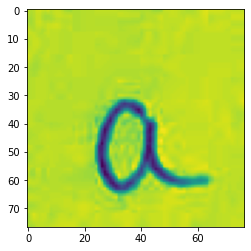

In [11]:
img = cv2.imread('/content/drive/MyDrive/pic_noArgument/dataset/a/5.jpg', 0)
plt.imshow(img)

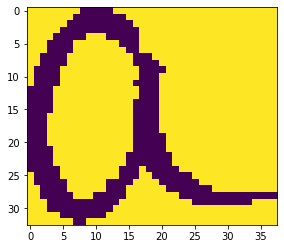

In [12]:
img = cv2.imread('/content/drive/MyDrive/pic_noArgument/dataset/a/5.jpg', 0)
editedImg = crop_img(img)
editedImg = cv2.bitwise_not(editedImg)
plt.imshow(editedImg)

In [13]:
#for char in list_folders:
  #count = 0
  #for img_name in os.listdir('/content/drive/MyDrive/dataset/' + char):
    #img = cv2.imread('/content/drive/MyDrive/dataset/' + char + '/' + img_name)
    #editedImg = crop_img(img)
    #editedImg = cv2.bitwise_not(editedImg)
    #try:
      #cv2.imwrite('/content/drive/MyDrive/Bin_data_crop/' + char + '/' + str(count) + '.jpg', editedImg)
      #count += 1
    #except:
      #continue

In [14]:
f_data_final = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
print(f_data_final)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [15]:
#for char in f_data_final:
    #link = '/content/drive/MyDrive/final_data_processed' + '/' + char
    #for img_name in os.listdir(link):
        #img = cv2.imread(link + '/' + img_name)
        #img_resized = cv2.resize(img, (16, 20))
        #cv2.imwrite('/content/drive/MyDrive/datatrain_16x20/' + char + '/' + img_name, img_resized)

In [16]:
#for char in f_data_final:
  #link = '/content/drive/MyDrive/datatrain_16x20' + '/' + char
  #list_name_img = os.listdir(link)
  #count = 0
  #for name_img in list_name_img:
    #os.chdir(link)
    #os.rename(name_img, 'pic_' + str(count) + '.jpg')
    #count+=1

(20, 16, 3)


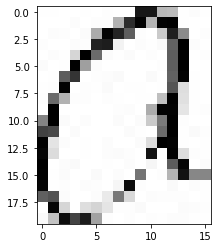

In [17]:
example = cv2.imread('/content/drive/MyDrive/pic_noArgument/datatrain_16x20/a/pic_0.jpg')
print(example.shape)
plt.imshow(example)

In [18]:
def rotate_image(img, angle):
    (h, w) = (img.shape[:2])
    (cX, cY) = (w // 2, h // 2)
    
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
        
    # perform the actual rotation and return the image
    img_rotate = cv2.warpAffine(img, M, (nW, nH), False)
    return img_rotate

In [19]:
def change_Arr(link, label):
    list_arr = []
    for img_link in link:
        img = Image.open(img_link).convert('L')   ## to change the img into 1D array
        _, img_hog = hog(img, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)
        list_arr.append(np.asarray(img_hog).flatten())

        img = np.asarray(img)

        img_blur = cv2.blur(img,(2, 2))
        _, img_blur_hog = hog(img_blur, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)
        list_arr.append(np.asarray(img_blur_hog).ravel())

        img_rotate15 = rotate_image(img, 15)
        img_rotate15 = cv2.resize(img_rotate15, (16, 20))
        _, img_rotate15_hog = hog(img_rotate15, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)
        list_arr.append(np.asarray(img_rotate15_hog).ravel())

        img_rotate15x = rotate_image(img, -15)
        img_rotate15x = cv2.resize(img_rotate15x, (16, 20))
        _, img_rotate15x_hog = hog(img_rotate15x, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)
        list_arr.append(np.asarray(img_rotate15x_hog).ravel())

        img_rotate30 = rotate_image(img, 30)
        img_rotate30 = cv2.resize(img_rotate30, (16, 20))
        _, img_rotate30_hog = hog(img_rotate30, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)
        list_arr.append(np.asarray(img_rotate30_hog).ravel())

        img_rotate30x = rotate_image(img, -30)
        img_rotate30x = cv2.resize(img_rotate30x, (16, 20))
        _, img_rotate30x_hog = hog(img_rotate30x, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)
        list_arr.append(np.asarray(img_rotate30x_hog).ravel())

    return np.array(list_arr), np.array(label)

In [20]:
link_img_train = []
label_img_train = []

index = 0
for char in f_data_final:
    link = '/content/drive/MyDrive/pic_noArgument/datatrain_16x20' + '/' + char
    list_name_img = os.listdir(link)
    temp = []
    for name_img in list_name_img:
        link_img_train.append(link + '/' + name_img)
        temp.append(index)
    temp = temp * 6
    label_img_train = label_img_train + temp
    index += 1

In [21]:
data_train_final, label_train_final = change_Arr(link_img_train, label_img_train)

In [22]:
pd.DataFrame(data_train_final).to_csv('/content/drive/MyDrive/Dataframe_training_final_HOG_arg.csv', header= None, index=None)

In [23]:
pd.DataFrame(label_train_final).to_csv('/content/drive/MyDrive/Labelframe_training_final_HOG_arg.csv', header= None, index=None)